In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [34]:
DataMent = pd.read_csv('/Users/booba/Downloads/Mental Health Dataset.csv')

In [35]:
DataMent.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [51]:
print(DataMent.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [36]:
print(DataMent.shape)

(292364, 17)


In [37]:
print(DataMent.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [38]:
print(DataMent.isnull().sum())

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [39]:
Missing_Values = DataMent.isnull().sum()

Missing_values_Percentage = ((Missing_Values/len(DataMent))*100)

print(Missing_values_Percentage)

Timestamp                  0.000000
Gender                     0.000000
Country                    0.000000
Occupation                 0.000000
self_employed              1.779289
family_history             0.000000
treatment                  0.000000
Days_Indoors               0.000000
Growing_Stress             0.000000
Changes_Habits             0.000000
Mental_Health_History      0.000000
Mood_Swings                0.000000
Coping_Struggles           0.000000
Work_Interest              0.000000
Social_Weakness            0.000000
mental_health_interview    0.000000
care_options               0.000000
dtype: float64


In [40]:
DataMent1 = DataMent.dropna()

In [41]:
print(DataMent1.isnull().sum())

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [24]:
from ydata_profiling import ProfileReport

# Crée le rapport Pandas Profiling
profile = ProfileReport(DataMent1, title="Profiling Report -Mental Health", explorative=True)

# Sauvegarde le rapport dans un fichier HTML
profile.to_file("/Users/booba/Desktop/mon_environnement/Mental Health.html")

/Users/booba/miniconda3/envs/mon_env/lib/python3.9/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 239.65it/s]


In [42]:
print(DataMent1.duplicated().sum())

2304


In [47]:
# Supprimer les doublons
DataMent1 = DataMent1.drop_duplicates()

# Vérifier le nombre de doublons après suppression
print(DataMent1.duplicated().sum())  # Doit afficher 0

0


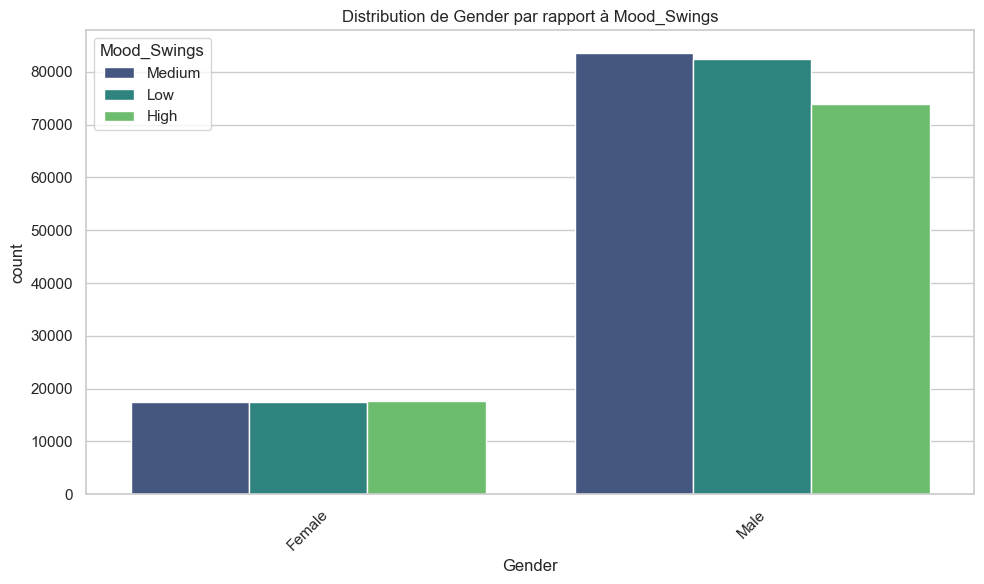

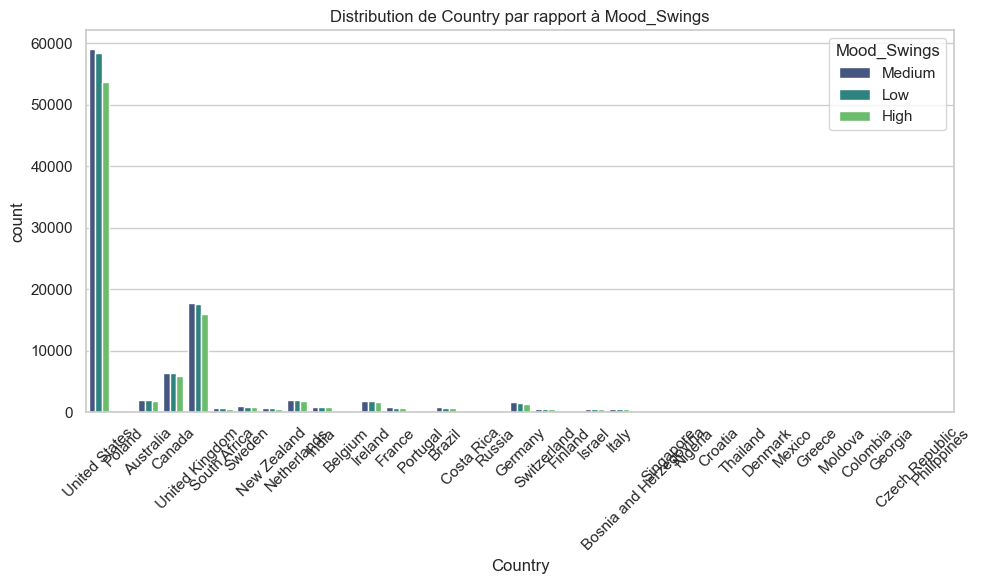

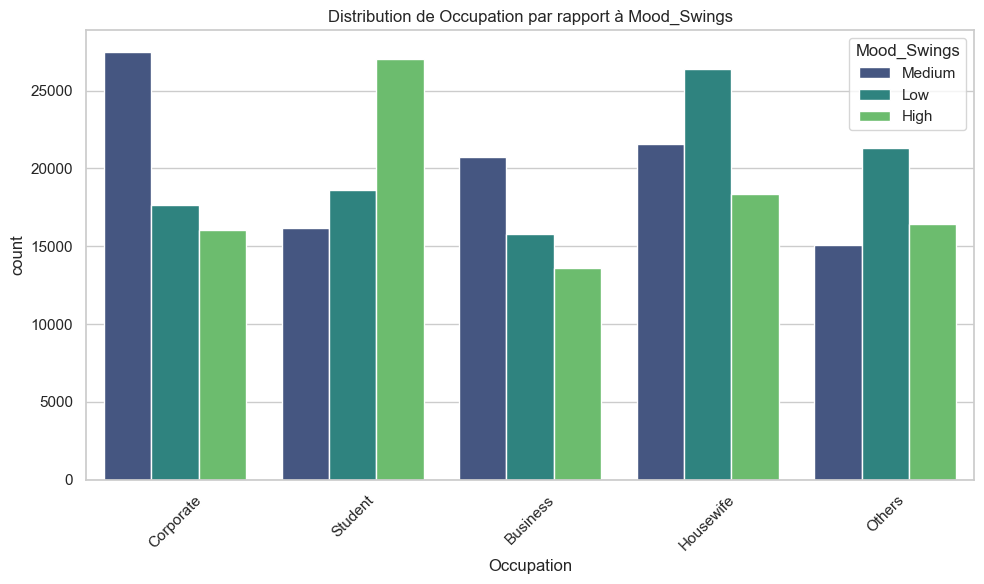

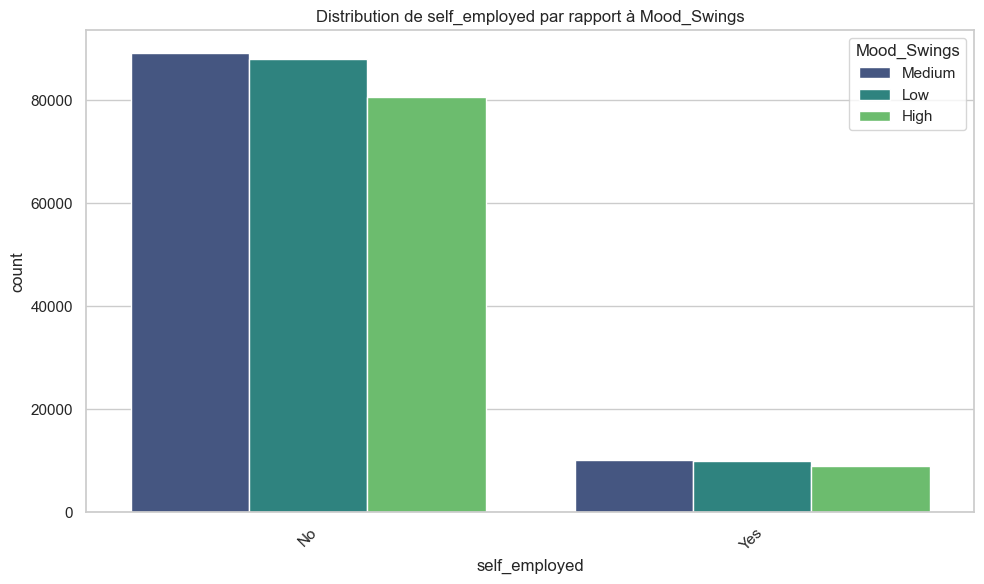

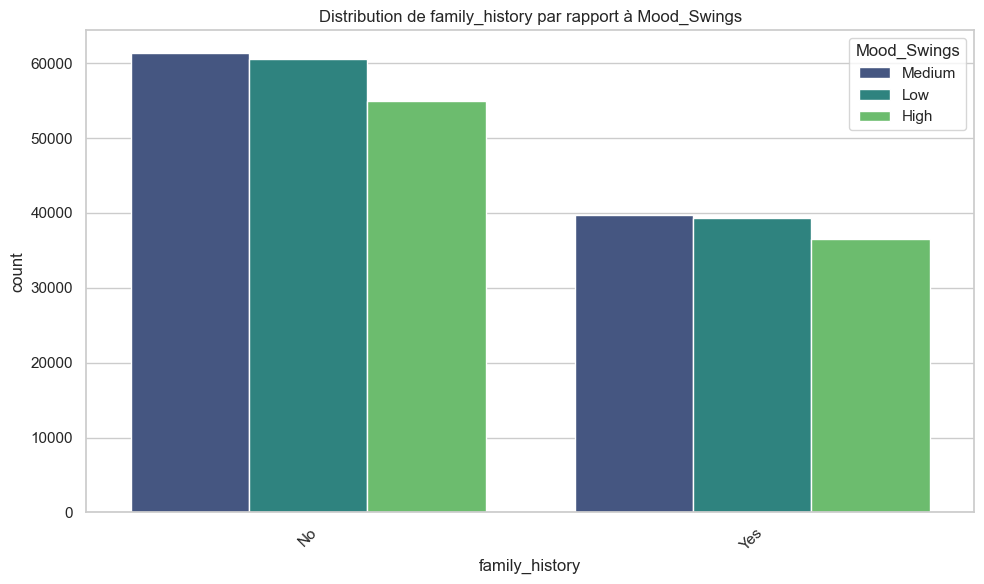

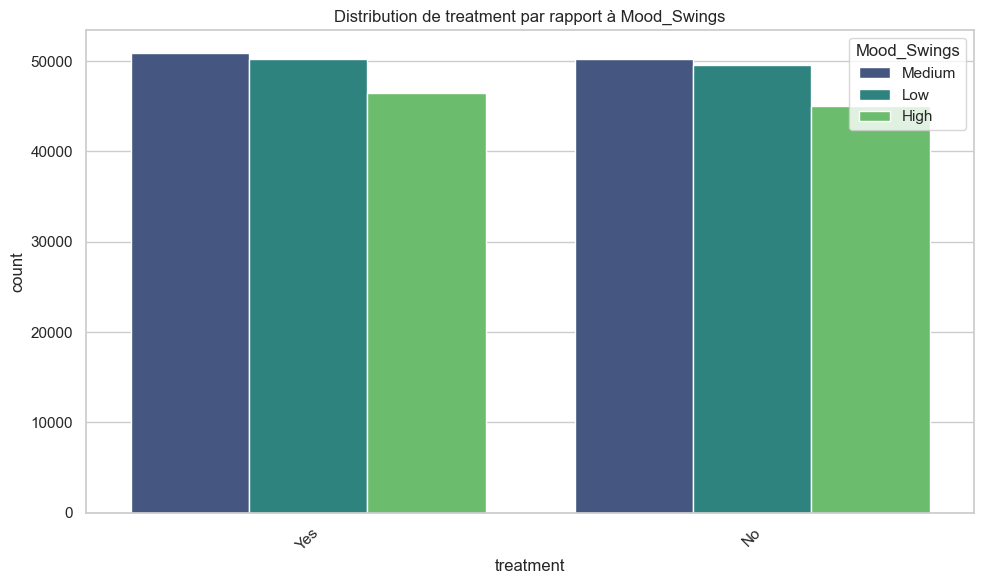

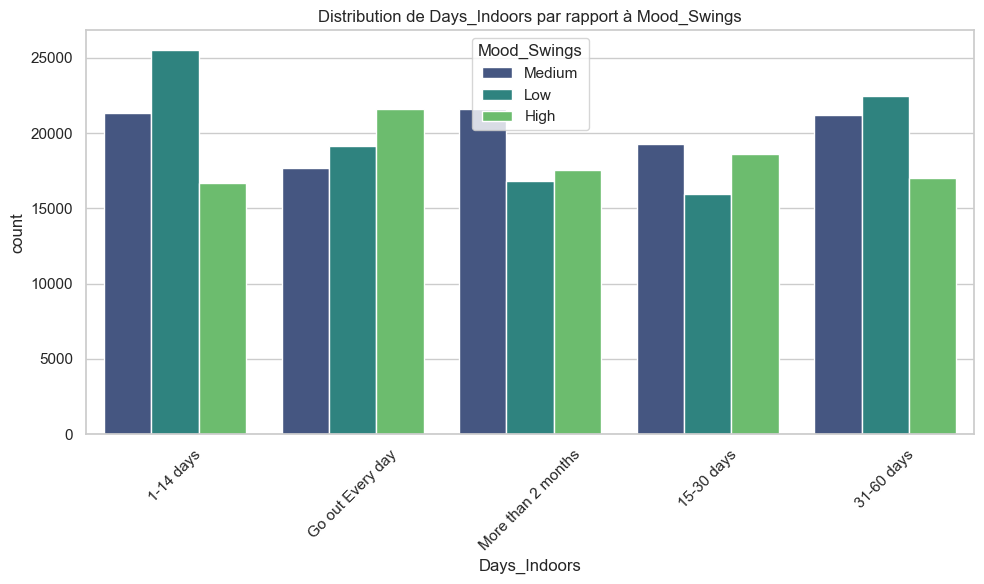

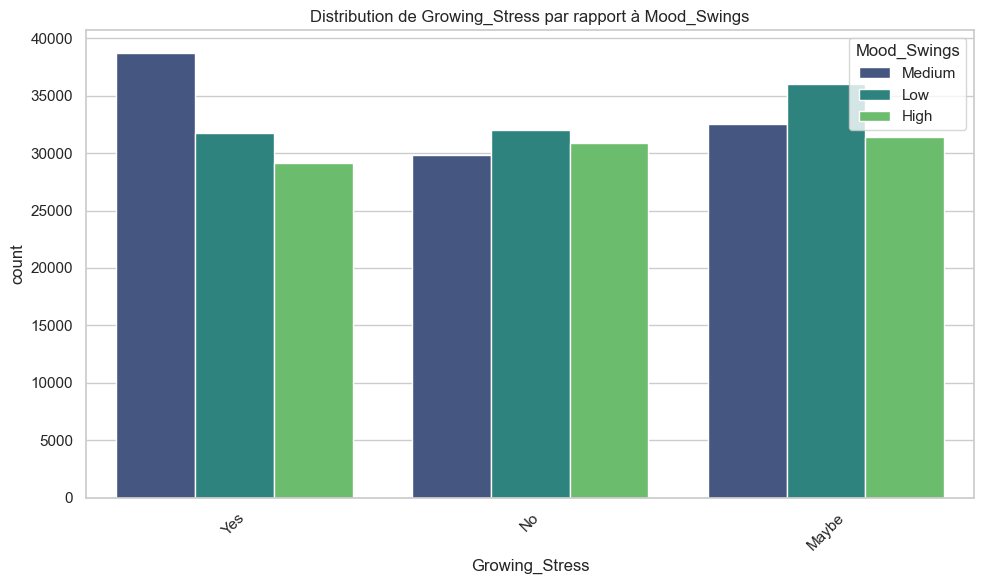

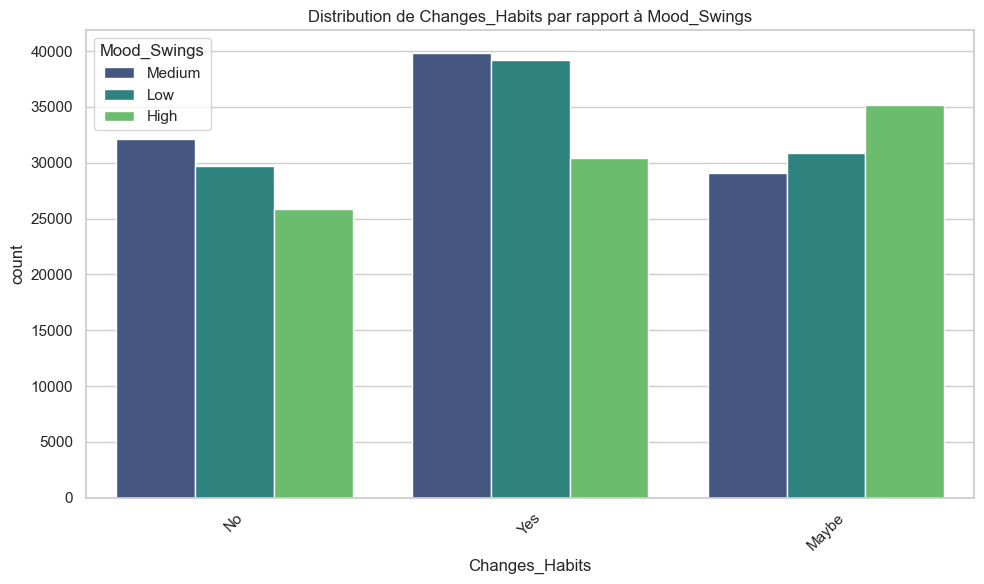

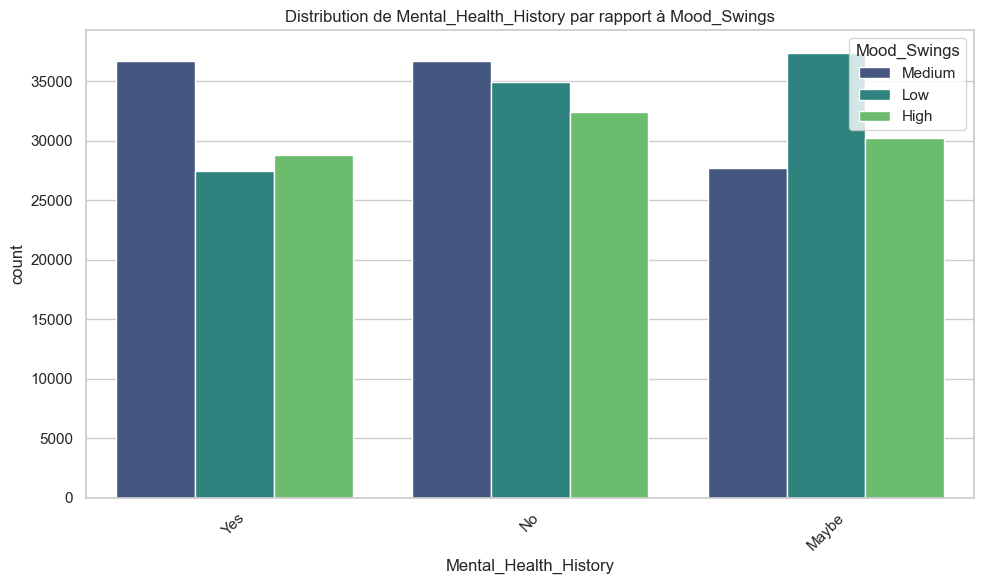

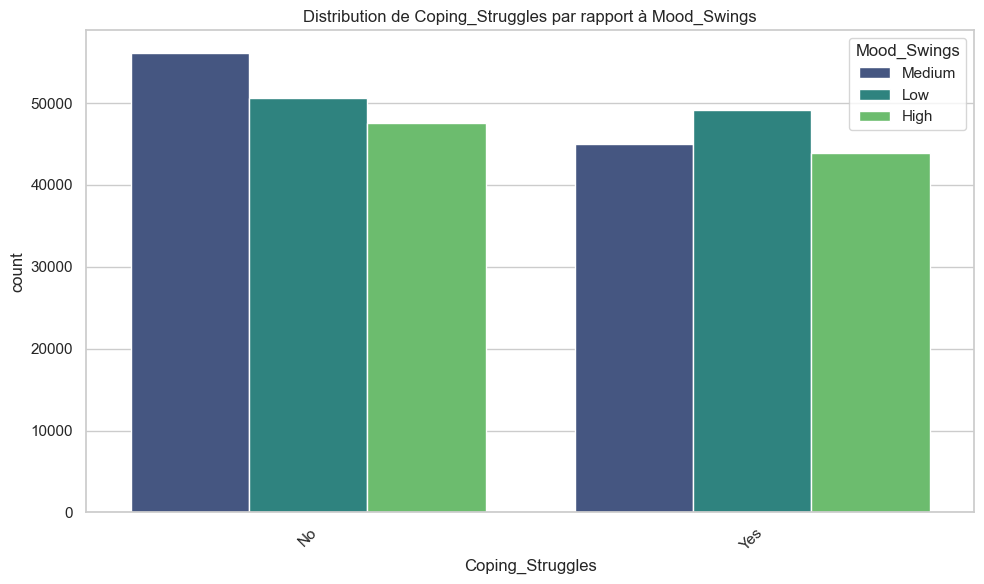

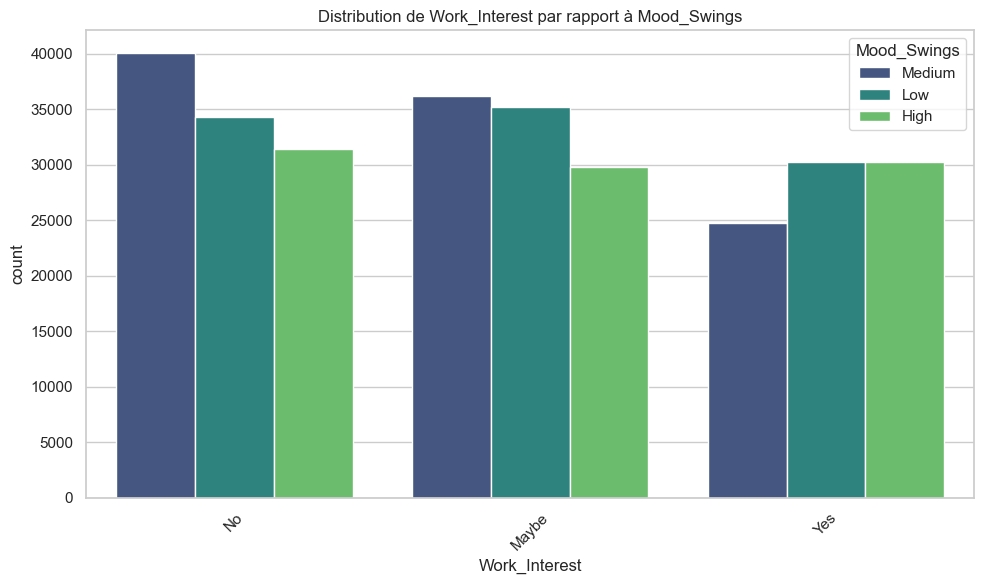

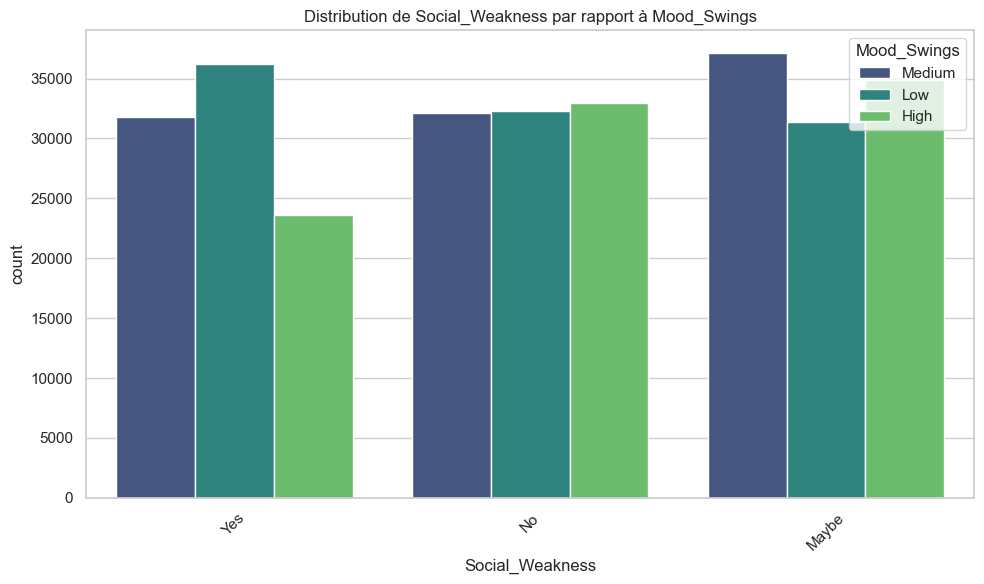

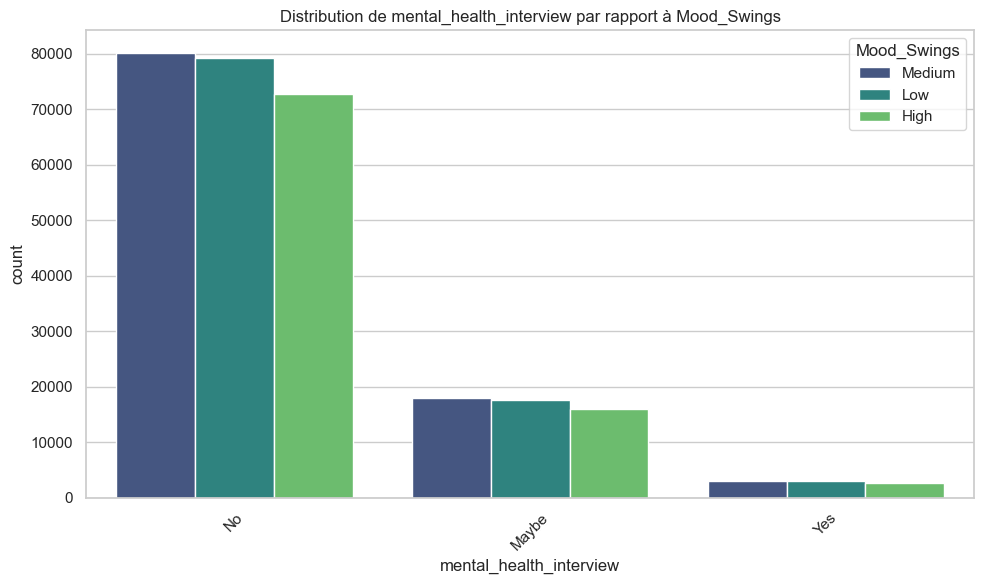

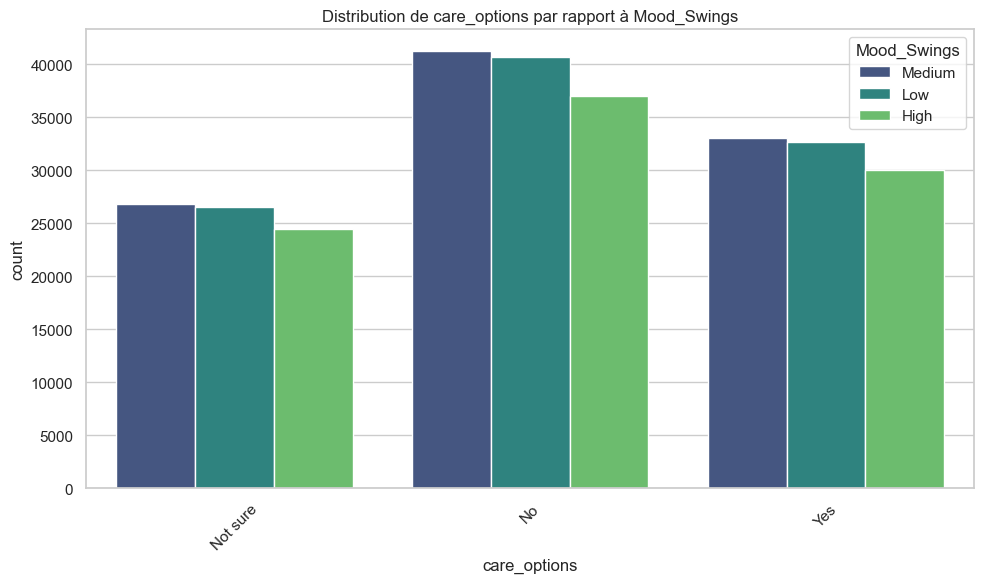

In [52]:
# Liste des colonnes à visualiser par rapport à 'Mood_Swings'
columns_to_visualize = [
    'Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
    'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
    'Mental_Health_History', 'Coping_Struggles', 'Work_Interest',
    'Social_Weakness', 'mental_health_interview', 'care_options'
]

# Configurer le style des graphiques
sns.set(style="whitegrid")

# Boucle pour créer les visualisations
for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    
    # Si la colonne est catégorielle
    if DataMent1[col].dtype == 'object':
        # Diagramme en barres
        sns.countplot(data=DataMent, x=col, hue='Mood_Swings', palette='viridis')
        plt.title(f'Distribution de {col} par rapport à Mood_Swings')
        plt.xticks(rotation=45)
        plt.legend(title='Mood_Swings')
    
    # Si la colonne est numérique
    else:
        # Boxplot
        sns.boxplot(data=DataMent, x='Mood_Swings', y=col, palette='coolwarm')
        plt.title(f'Distribution de {col} par rapport à Mood_Swings')
    
    plt.tight_layout()
    plt.show()

                        Timestamp    Gender   Country Occupation  \
Timestamp                     1.0  0.896998    0.9063   0.022038   
Gender                   0.896998  0.999988  0.177849   0.049137   
Country                    0.9063  0.177849       1.0   0.004369   
Occupation               0.022038  0.049137  0.004369        1.0   
self_employed            0.896845  0.065145  0.340498   0.003193   
family_history           0.888107  0.199204  0.233545   0.009789   
treatment                0.882104  0.177194  0.259197   0.008707   
Days_Indoors             0.013882  0.030951  0.002752   0.069553   
Growing_Stress           0.037303  0.058813  0.007396   0.078032   
Changes_Habits           0.007937  0.012514  0.001574   0.065786   
Mental_Health_History    0.024378  0.038434  0.004833   0.075056   
Mood_Swings              0.015148  0.023883  0.003003   0.135023   
Coping_Struggles         0.050546  0.056341  0.010022   0.079793   
Work_Interest            0.014063  0.022171  0.0

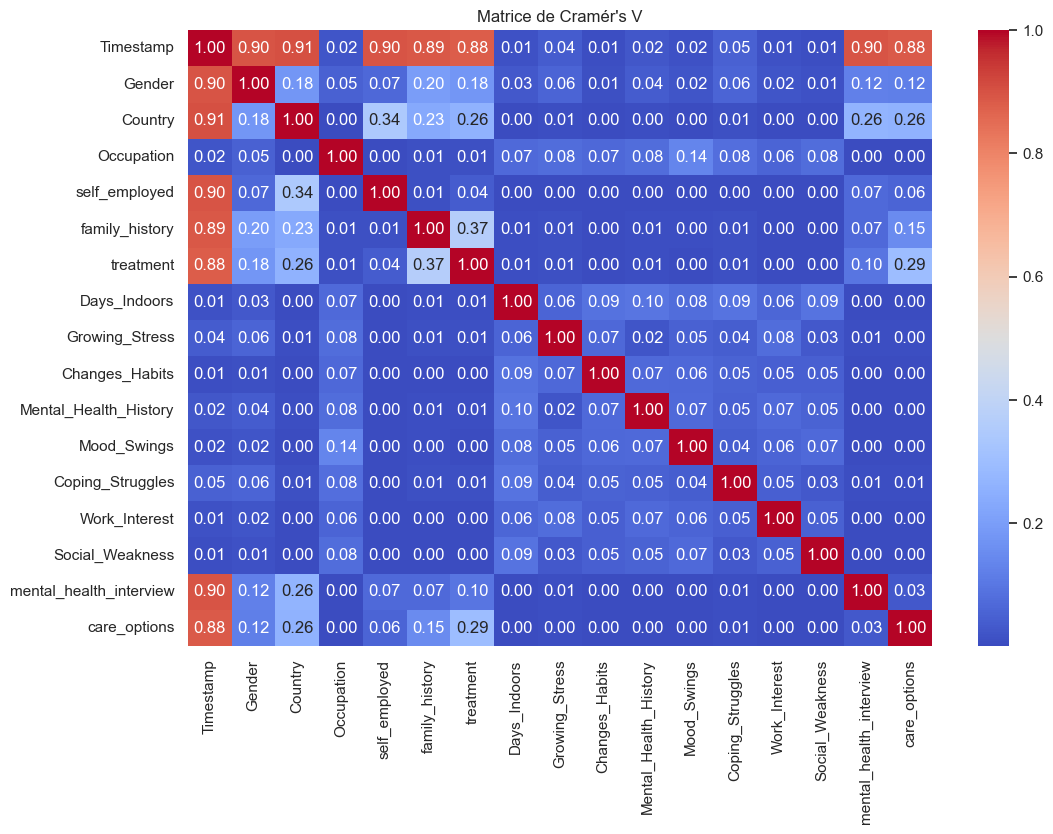

In [53]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calcule le coefficient de Cramér's V entre deux variables catégorielles."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Exemple d'utilisation
cramers_results = pd.DataFrame(index=DataMent.columns, columns=DataMent.columns)

for col1 in DataMent.columns:
    for col2 in DataMent.columns:
        cramers_results.loc[col1, col2] = cramers_v(DataMent[col1], DataMent[col2])

# Afficher la matrice de Cramér's V
print(cramers_results)



plt.figure(figsize=(12, 8))
sns.heatmap(cramers_results.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Cramér's V")
plt.show()

In [57]:
DataMent1 = DataMent1.drop(columns=['Timestamp'])

In [58]:
# Initialiser les LabelEncoders
label_encoders = {col: LabelEncoder() for col in DataMent1.columns}

# Encoder les colonnes catégorielles en utilisant .loc
for col in label_encoders:
    DataMent1.loc[:, col] = label_encoders[col].fit_transform(DataMent1[col])

# Afficher le DataFrame encodé
print(DataMent1)

        Gender  Country  Occupation  self_employed  family_history  treatment  \
3            0       34           1              0               1          1   
4            0       34           1              0               1          1   
5            0       25           1              0               0          1   
6            0        0           1              0               1          1   
7            0       34           1              0               0          0   
...        ...      ...         ...            ...             ...        ...   
292359       1       34           0              1               1          1   
292360       1       29           0              0               1          1   
292361       1       34           0              0               1          0   
292362       1       34           0              0               1          1   
292363       1       34           0              0               1          1   

        Days_Indoors  Growi

In [59]:
# Séparer les features (X) et la target (y)
X = DataMent1.drop('Mood_Swings', axis=1)  # Remplacez 'target' par le nom de votre colonne cible
y = DataMent1['Mood_Swings']

In [62]:
print(DataMent1['Mood_Swings'].value_counts())

Mood_Swings
2    98592
1    97392
0    88874
Name: count, dtype: int64


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
gb_model = GradientBoostingClassifier(random_state=42)

# Entraîner le modèle
gb_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_gb = gb_model.predict(X_test)

# Évaluer le modèle
print("GradientBoostingClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("Classification Report :\n", classification_report(y_test, y_pred_gb))

GradientBoostingClassifier :
Accuracy : 0.6664501860563083
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.58      0.62     17608
           1       0.66      0.68      0.67     19613
           2       0.67      0.73      0.70     19751

    accuracy                           0.67     56972
   macro avg       0.67      0.66      0.66     56972
weighted avg       0.67      0.67      0.66     56972



In [67]:
from sklearn.metrics import confusion_matrix

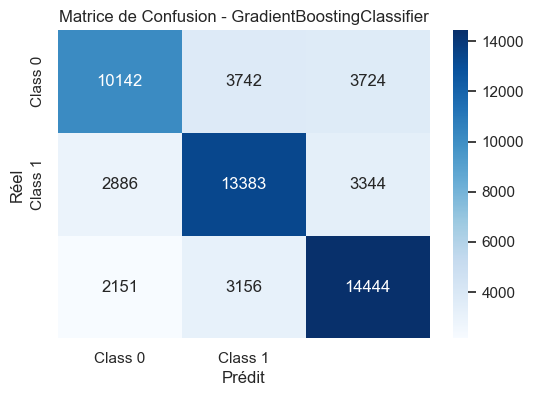

In [68]:
# Matrice de confusion pour GradientBoostingClassifier
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - GradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [63]:
from sklearn.ensemble import AdaBoostClassifier

# Initialiser le modèle
ada_model = AdaBoostClassifier(random_state=42)

# Entraîner le modèle
ada_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_ada = ada_model.predict(X_test)

# Évaluer le modèle
print("AdaBoostClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_ada))
print("Classification Report :\n", classification_report(y_test, y_pred_ada))

AdaBoostClassifier :
Accuracy : 0.4446745769851857
Classification Report :
               precision    recall  f1-score   support

           0       0.45      0.35      0.39     17608
           1       0.44      0.41      0.42     19613
           2       0.45      0.57      0.50     19751

    accuracy                           0.44     56972
   macro avg       0.44      0.44      0.44     56972
weighted avg       0.44      0.44      0.44     56972



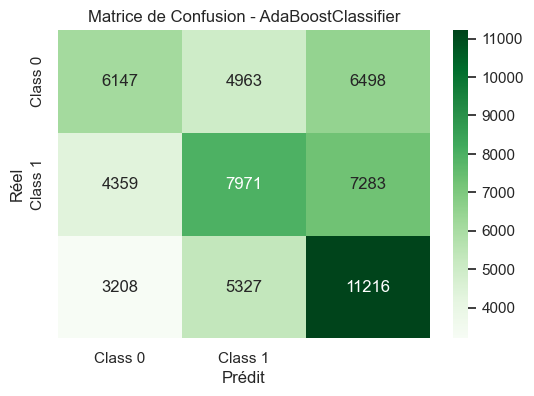

In [69]:
# Matrice de confusion pour AdaBoostClassifier
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - AdaBoostClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [64]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialiser le modèle
hist_model = HistGradientBoostingClassifier(random_state=42)

# Entraîner le modèle
hist_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_hist = hist_model.predict(X_test)

# Évaluer le modèle
print("HistGradientBoostingClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_hist))
print("Classification Report :\n", classification_report(y_test, y_pred_hist))

HistGradientBoostingClassifier :
Accuracy : 0.9794811486344169
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     17608
           1       0.98      1.00      0.99     19613
           2       0.98      0.97      0.97     19751

    accuracy                           0.98     56972
   macro avg       0.98      0.98      0.98     56972
weighted avg       0.98      0.98      0.98     56972



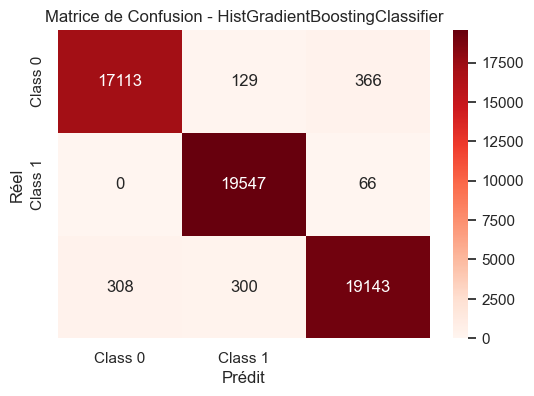

In [70]:
# Matrice de confusion pour HistGradientBoostingClassifier
cm_hist = confusion_matrix(y_test, y_pred_hist)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hist, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - HistGradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [65]:
from xgboost import XGBClassifier

# Initialiser le modèle
xgb_model = XGBClassifier(random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluer le modèle
print("XGBoost :")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Classification Report :\n", classification_report(y_test, y_pred_xgb))

XGBoost :
Accuracy : 0.9769009337920382
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17608
           1       0.99      0.98      0.99     19613
           2       0.98      0.96      0.97     19751

    accuracy                           0.98     56972
   macro avg       0.98      0.98      0.98     56972
weighted avg       0.98      0.98      0.98     56972



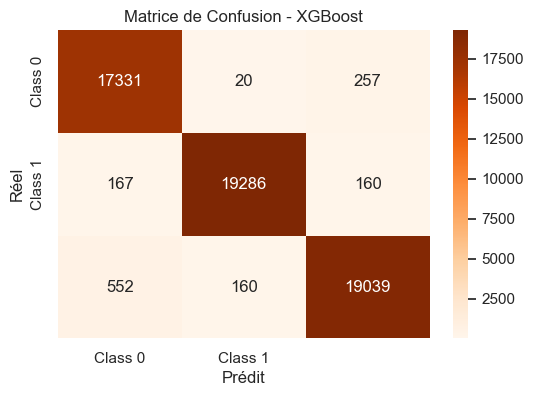

In [71]:
# Matrice de confusion pour XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - XGBoost')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [66]:
# Récapitulatif des performances
results = {
    'Model': ['GradientBoosting', 'AdaBoost', 'HistGradientBoosting', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_hist),
        accuracy_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Model  Accuracy
0      GradientBoosting  0.666450
1              AdaBoost  0.444675
2  HistGradientBoosting  0.979481
3               XGBoost  0.976901


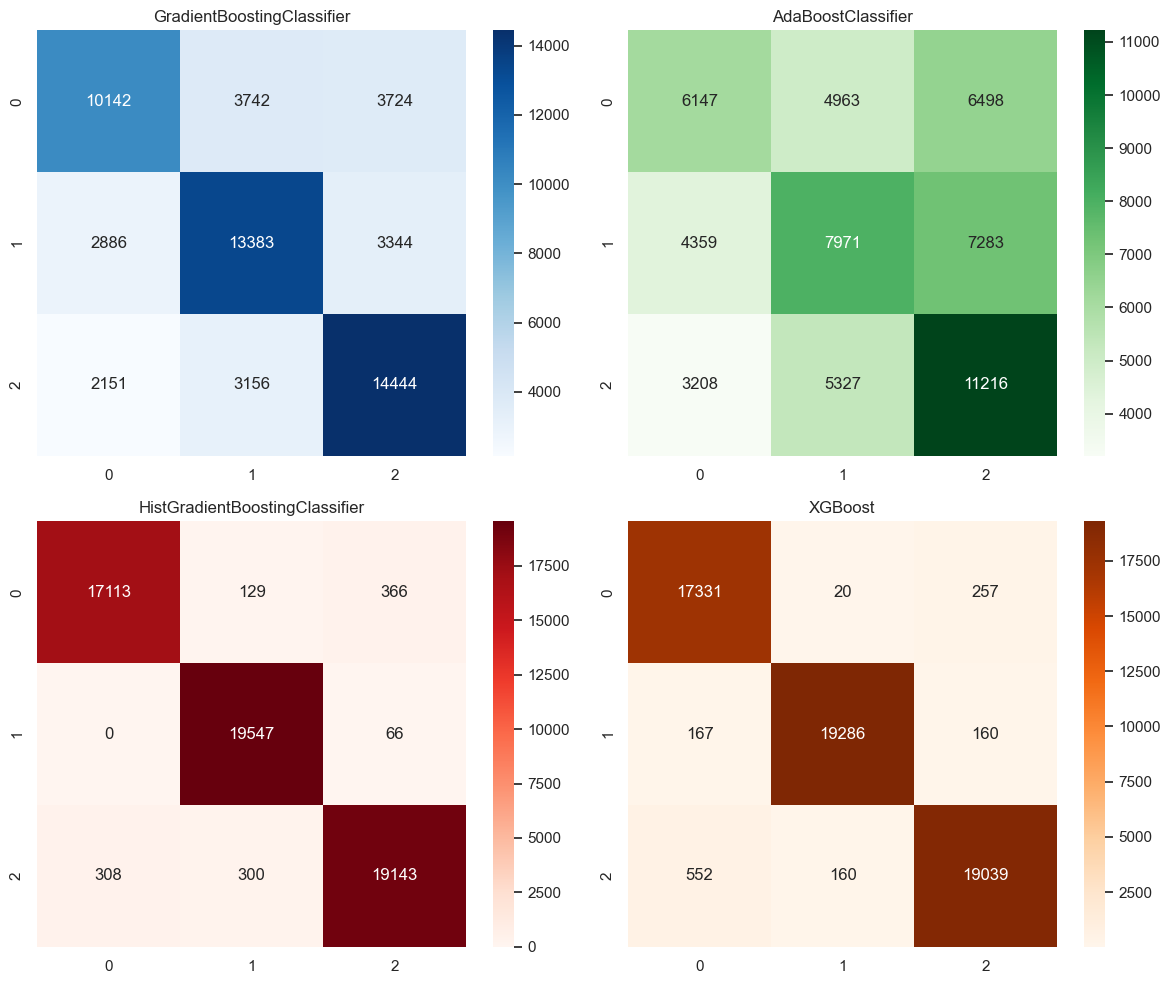

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GradientBoostingClassifier
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('GradientBoostingClassifier')

# AdaBoostClassifier
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('AdaBoostClassifier')

# HistGradientBoostingClassifier
sns.heatmap(cm_hist, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0])
axes[1, 0].set_title('HistGradientBoostingClassifier')

# XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1])
axes[1, 1].set_title('XGBoost')

plt.tight_layout()
plt.show()

In [73]:
import pickle

# Dossier de sauvegarde
import os
os.makedirs('saved_models', exist_ok=True)

# Sauvegarder HistGradientBoostingClassifier
with open('saved_models/hist_model.pkl', 'wb') as f:
    pickle.dump(hist_model, f)

# Sauvegarder XGBoost
with open('saved_models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("Modèles sauvegardés dans le dossier 'saved_models'.")

Modèles sauvegardés dans le dossier 'saved_models'.
